In [156]:
import numpy as np

import pandas as pd

import cv2

import matplotlib.pyplot as plt

import skimage.io as io

import skimage as sk

from skimage.feature import greycomatrix, greycoprops
from skimage import data


In [157]:
image = cv2.imread('ACdata_base/1/0060.jpg')
names = np.loadtxt("ACdata_base/names.txt", dtype=str)

In [158]:
def show_images(images,titles=None):
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

def PreProcessing(img):
    
    # (1) RGB to Gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # (2) threshold
    th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    pts = cv2.findNonZero(threshed)
    ret = cv2.minAreaRect(pts)

    # (3) minAreaRect on the nonzeros
    H, W = img.shape[:2]
    (cx, cy), (w, h), ang = ret

    if (H > W and w > h) or (H < W and w < h):
        w, h = h, w
        ang += 90

    # (4) Find rotated matrix, do rotation
    M = cv2.getRotationMatrix2D((cx, cy), ang, 1.0)
    rotated = cv2.warpAffine(threshed, M, (img.shape[1], img.shape[0]))

    # (5) find and draw the upper and lower boundary of each lines
    hist = cv2.reduce(rotated, 1, cv2.REDUCE_AVG).reshape(-1)
    th = 2
    upper = [y for y in range(H-1) if hist[y] <= th and hist[y+1] > th]
    lower = [y for y in range(H-1) if hist[y] > th and hist[y+1] <= th]
    
    line = []
    line.append(rotated[upper[0]-5:lower[0]+5, :])
    return line

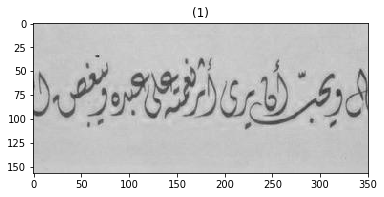

In [159]:
show_images([image])

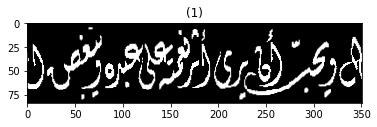

In [160]:
line = PreProcessing(image)
show_images(line)